# **Spike Challenge**

**Alejandra De Luna Pámanes** <br/>
alejandradlp95@gmail.com <br/>
<br/>
July 27, 2021

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
import tensorflow as tf
from textwrap import wrap
import IPython

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}         

plt.rc('font', **font) 

plt.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (15, 10)  

## **Data**. Precipitation, Central Bank Economic Indicators

We start by loading the data.

In [3]:
precipitaciones = pd.read_csv('precipitaciones.csv')

In [4]:
bancoCentral = pd.read_csv('banco_central.csv')

In [5]:
precioLeche = pd.read_csv('precio_leche.csv')

## **Data analysis**. Creation of variables

### Precipitation

The *precipitaciones* data is composed of 9 columns and 496 observations

In [6]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


We transform the date data to datetime objects, sort the dataframe by date and set it as index.

In [7]:
precipitaciones.date = pd.to_datetime(precipitaciones.date)
precipitaciones = precipitaciones.sort_values(by='date')

precipitaciones = precipitaciones.set_index(['date'])

precipitaciones.head()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
date,,,,,,,,
1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116


We see below a general overview of the data. Los Rios has the greatest standard variation in its precipitation and the highest mean rainfall. Contrary to Coquimbo, which has the lowest standard deviation and the lowest mean rainfall.

In [8]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


We proceed to check the percentage of missing data.

In [9]:
precipitaciones.isnull().sum()/len(precipitaciones)*100

Coquimbo                               0.0
Valparaiso                             0.0
Metropolitana_de_Santiago              0.0
Libertador_Gral__Bernardo_O_Higgins    0.0
Maule                                  0.0
Biobio                                 0.0
La_Araucania                           0.0
Los_Rios                               0.0
dtype: float64

And check the data types we will be working with.

In [10]:
precipitaciones.dtypes

Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

And we print a sneak peak of the data.

In [11]:
bancoCentral.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,...,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.189.562,380.345.362,684.106.836,945.996.965,824.530.386,172.638.981,831.959.074,224.791.502,280.438.294,749.055.837,110.658.893,209.310.713,544.306.818,348.801.015,565.071.466,121.229.491,80.455.108,144.685.333,511.803.995,107.193.235,901.755.

Finally, we observe that the different regions have a similar distribution.

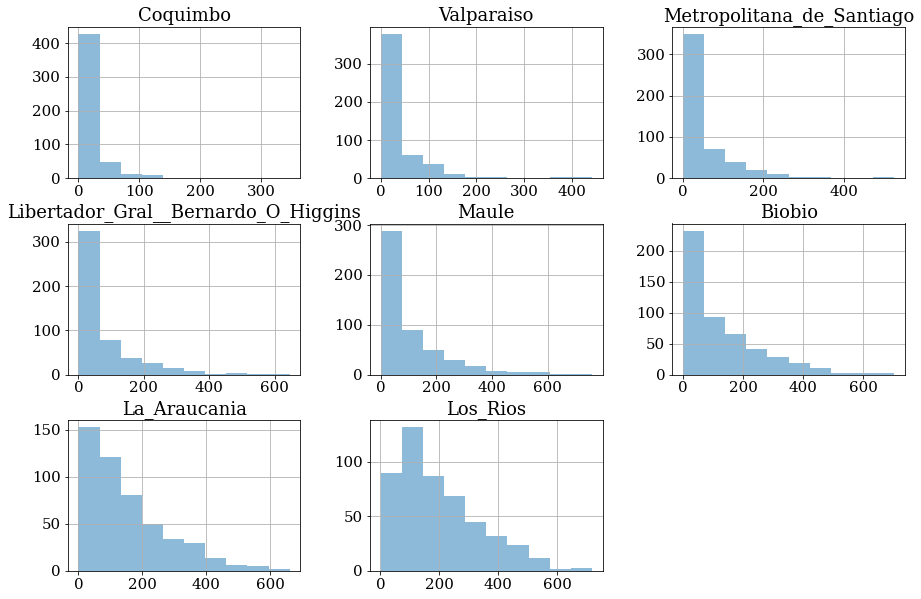

In [12]:
precipitaciones.hist(alpha=0.5)
plt.show()

### Central Bank

Similarly to the precipitations dataset, we proceed to load and set the date as a datetime object. Then, we sort the dataset according to the date.

In [13]:
bancoCentral = pd.read_csv('banco_central.csv')

bancoCentral = bancoCentral.rename(columns={'Periodo':'date'})

bancoCentral.date = pd.to_datetime(bancoCentral.date, format='%Y-%m-%d %H:%M:%S %Z', errors='coerce')

bancoCentral.date = bancoCentral.date.dt.strftime('%Y-%m-%d')

bancoCentral = bancoCentral.sort_values(by='date')

bancoCentral.head()

,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
146,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,1970-05-01,NaN,N

For simplicity, we replace all NaN values by numpy NaN objects.

In [14]:
bancoCentral = bancoCentral.replace('NaN',np.NaN)

bancoCentral.tail()

,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
92,2020-08-01,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,15.867.781,614.712.298,130.864.273,117.055.913,138.696.143,125.163.085,348.252.328,145.265.267,181.336.575,695.058.355,100.894,696.175.197,20.574.056,620.686.057,224.424.342,349.021.362,563.906.737,112.885.251,148.145.017,471.891.836,407.014.189,711.575.686,110.732.905,919.298.916,140.456.962,617.357.193,105.754.404,102.845.077,367.179.462,116.407.225,...,2.3017,44.26,29.112.198,42.36,50.560,784.661.905,719.220.979,420.865.087,188.635.469,760.674.725,519.738.038,237.711.562,266.780.125,625.957.713,192.282.632,14.536.482,433.936.723,247.933.317,494.165.662,134.420.358,557.268.994,510.139.079,704.193.946,537.403.169,582.058.072,247.380.646,205.649.835,130.081.437,250.863.133,113.297.619,10.151.671,990.282.658,10.054.901,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0
93,2020-09-01,103.201.091,922.072.659,100.589.658,100.132.069,793.042.271,111.622.999,108.317.886,102.561.718,103.388.943,169.746.171,468.872.234,126.941.868,114.236.494,127.906.055,12.788.268,334.311.036,154.593.729,206.059.133,707.756.582,10.193.638,996.674.021,208.546.206,667.372.687,221.859.982,3.418.235,568.930.633,116.421.079,164.601.774,509.565.911,439.254.033,720.980.294,127.546.136,948.454.602,131.205.334,619.801.512,107.849.

As we can see, we have a NaN date, so we remove it and set date as the index.

In [15]:
bancoCentral = bancoCentral.dropna(subset=['date'])

bancoCentral = bancoCentral.set_index(['date'])

bancoCentral.tail()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-01,966.693.225,933.369.433,104.988.256,969.434.205,813.420.488,931.746.336,996.428.565,966.321.757,955.926.074,188.331.918,707.214.659,1.324.928,119.520.525,130.720.477,123.810.329,369.570.934,13.719.304,164.021.248,67.608.185,107.190.882,609.781.142,19.547.729,534.278.857,212.795.981,349.938.753,546.133.083,971.797.167,122.619.775,441.549.174,42.522.432,715.080.906,113.112.652,911.758.222,116.566.888,615.639.916,101.614.557,882.643.703,640.580.433,111.070.003,30.523.026,...,1.7352,42.81,27.907.446,40.75,49.210,784.729.091,707.319.252,447.793.907,184.878.482,744.755.052,492.769.824,23.053.156,259.281.389,617.888.263,184.909.271,148.435.617,436.602.145,228.225.445,499.226.063,130.955.253,573.558.346,498.038.334,692.015.061,534.903.192,551.778.125,231.918.421,197.525.285,0,210.013.123,112.749.545,100.164.187,977.952.851,989.525.701,10.629.584,946.859.919,6477.7,901.338.756,878.226.907,998.894.175,11454.0
2020-08-01,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,15.867.781,614.712.298,130.864.273,117.055.913,138.696.143,125.163.085,348.252.328,145.265.267,181.336.575,695.058.355,100.894,696.175.197,20.574.056,620.686.057,224.424.342,349.021.362,563.906.737

We then proceed to see an overview of the data. The most important observation is that we have high differences in the counts of each column, meaning we have a lot of missing data.

In [16]:
bancoCentral.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In fact, there are variables with almost 90% of missing data.

In [17]:
bancoCentral.isnull().sum()/len(bancoCentral)*100

Imacec_empalmado                                   51.060359
Imacec_produccion_de_bienes                        51.060359
Imacec_minero                                      51.060359
Imacec_industria                                   50.897227
Imacec_resto_de_bienes                             51.060359
                                                     ...    
Generacion_de_energia_electrica_CDEC_GWh           56.933116
Indice_de_ventas_comercio_real_IVCM                86.296900
Indice_de_ventas_comercio_real_no_durables_IVCM    86.296900
Indice_de_ventas_comercio_real_durables_IVCM       86.296900
Ventas_autos_nuevos                                76.345840
Length: 84, dtype: float64

Though, we will handle this issue later on. But before we proceed, we search for duplicate values.

In [18]:
bancoCentral[bancoCentral.index.duplicated(keep=False)]

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,...,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,167.218.756,618.107.584,127.494.583,114.044.798,135.911.049,134.337.385,352.713.059,155.499.282,282.857.251,761.910.666,10.666.085,113.232.043,205.964.209,753.121.123,229.592.623,341.668.896,771.082.628,110.815.907,240.435.294,648.893.077,417.627.795,686.888.472,120.587.594,945.484.562,17.263.425,585.841.147,11.510.209,104.105.171,515.511.264,12.603.131,53.532.204,...,2.9677,73.13,5.319.667,67.99,97.452,656.250.909,870.719.435,641.968.676,216.799.913,918.492.209,423.859.029,216.848.578,293.308,827.010.405,163.289.707,166.817.299,589.477.133,452.211.964,742.884.096,164.123.096,388.556.009,470.714.131,788.049.995,489.831.763,113.514.038,27.638.401,359.984.869,144.446.086,NaN,102.822.273,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,167.218.756,618.107.584,127.494.583,114.044.798,135.911.049,134.337.385,352.713.059,155.499.282,282.857.251,761.910.666,10.666.085,113.232.043,205.964.209,753.121.123,229.592.623,341.668.896,771.0

As we can see we have two pair of duplicates, but they both have the same data so we keep the first row in each case.

In [19]:
bancoCentral = bancoCentral.drop_duplicates(keep='first')

Then, we conitnue by removing the missing data. Though, we don't want to lose information given we don't know which variables best correlate with the price of milkt. So we create a temporary dictionary of datasets to drop NaN values of each column without affecting other variables to retain the most information possible.

In [20]:
bancoCentralDict = {}

for column in bancoCentral.columns:

  bancoCentralDict[column] = bancoCentral[column].dropna()

  bancoCentralDict[column].index = pd.to_datetime(bancoCentralDict[column].index,format='%Y-%m-%d')

  if type(min(bancoCentralDict[column])) is str:
    bancoCentralDict[column] = bancoCentralDict[column][bancoCentralDict[column].apply(lambda x:  True if x not in string.ascii_letters else False)]
    bancoCentralDict[column] = bancoCentralDict[column].apply(lambda x: x.replace('.',''))
    bancoCentralDict[column] = bancoCentralDict[column].apply(lambda x: float(x))

  else:
    bancoCentralDict[column] = bancoCentralDict[column][bancoCentralDict[column].apply(lambda x: type(x) is float)]

# **Visualization**.

In [21]:
def series_historicas(df, regions, startDate, endDate):

  if startDate not in df.index or endDate not in df.index:
    print('Dates are out of range.')
    return
  elif np.any([region not in df.columns for region in regions]):
    print('Region does not exist.')
    return

  dateRange = df.loc[startDate:endDate]

  dateRange[regions].plot()

  plt.ylabel('Precipitation')

  plt.gcf().autofmt_xdate()

  plt.legend(regions)

  plt.show()

We can see that in both cities there is a downward trend in the precipitation.

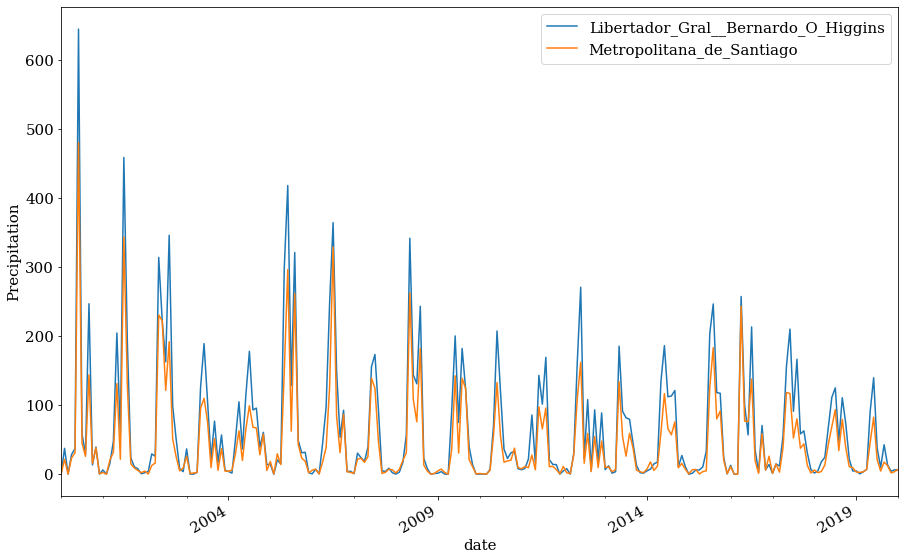

In [22]:
series_historicas(precipitaciones,['Libertador_Gral__Bernardo_O_Higgins','Metropolitana_de_Santiago'],'2000-01-01','2020-01-01')

In [23]:
def series_mesuales(df, region, years):
  
  if np.any([int(year) not in df.index.year for year in years]):
    print('Years are out of range.')
    return
  elif region not in df.columns:
    print('Region does not exist.')
    return

  for year in years:
  
    dateRange = df.loc[year]
  
    plt.plot(dateRange.index.strftime('%d-%b'), dateRange[region])

    plt.gcf().autofmt_xdate()

  plt.legend(years)

  plt.show()

Below we can visualize the yearly rain pattern, where the rain increases drastically in April and declines in July. Similarly, the driest months seem to be Decemeber and January. Also, we can seee that there has been a decrease in the total yearly rainfall.

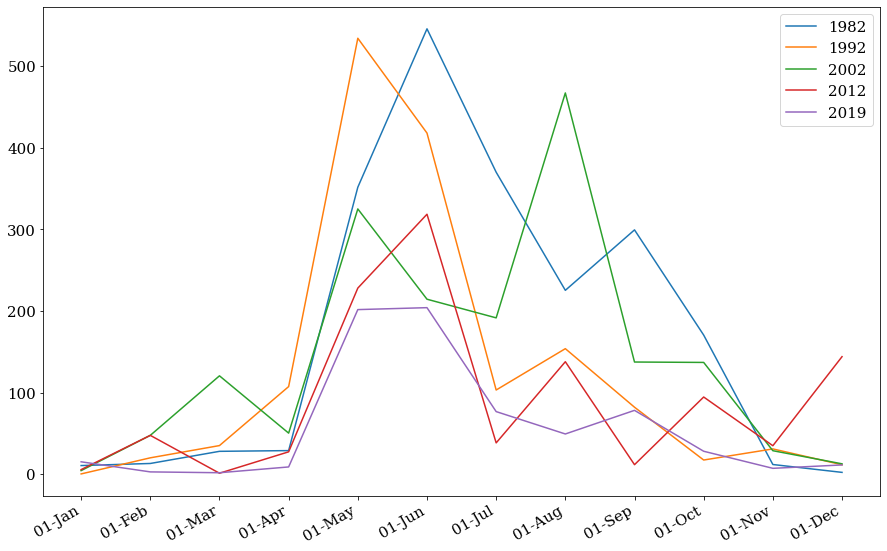

In [24]:
series_mesuales(precipitaciones,'Maule',['1982', '1992', '2002', '2012', '2019'])

In [25]:
def series_PIB(df, PIBs, startDate, endDate):
  
  for column in PIBs:

    if startDate == 'min':
      startDate = min(df[column].index)
      
    if endDate == 'max':
      endDate = max(df[column].index)

    dateRange = df[column].loc[startDate:endDate]

    plt.scatter(dateRange.index, dateRange)

  plt.gcf().autofmt_xdate()

  plt.legend(PIBs)

  plt.show()

The silvicultural agricultural GDP mantains a similar pattern over the years, and the financial services GDP has a slight upward trend.


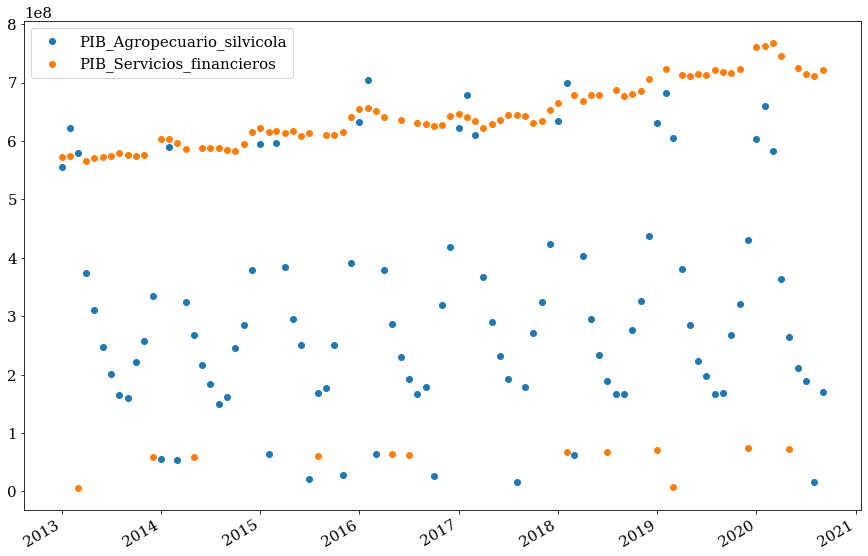

In [26]:
series_PIB(bancoCentralDict,['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'],'2013-01-01','max')

# **Tratamiento y creación de variables**.

We proceed with the creation of our model. So we start by briefly visualizing the data of the price of milk.

In [27]:
precioLeche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


We transform the month data and create a datetime object for each row. We use the date as the index.

In [28]:
precioLeche = precioLeche.replace({'Ene':'01','Feb':'02','Mar':'03','Abr':'04','May':'05','Jun':'06','Jul':'07','Ago':'08','Sep':'09','Oct':'10','Nov':'11','Dic':'12'})
precioLeche['date'] = pd.to_datetime(precioLeche['Anio'].astype(str) +'-' + precioLeche['Mes'], format='%Y-%m')

precioLeche = precioLeche.drop(['Anio','Mes'],axis=1)

precioLeche = precioLeche.set_index(['date'])

precioLeche.head()

,Precio_leche
date,
1979-01-01,3.85
1979-02-01,4.58
1979-03-01,5.18
1979-04-01,6.06
1979-05-01,7.25


In [29]:
precioLeche.describe()

,Precio_leche
count,506.000000
mean,114.444980
std,78.999882
min,3.850000
25%,48.162500
50%,102.250000
75%,189.175000
max,318.880000


We plot the data.

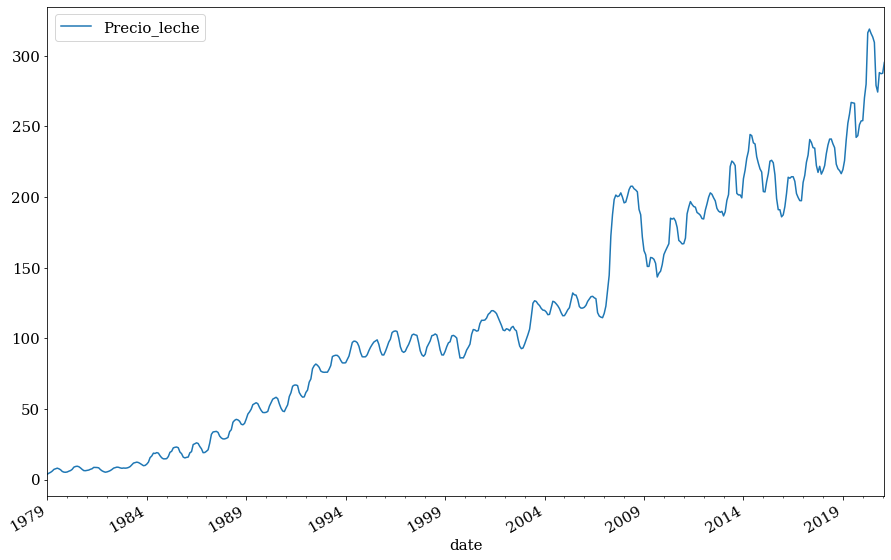

In [30]:
precioLeche.plot(legend=True)

plt.gcf().autofmt_xdate()

plt.show()

We can now remove the columns of Banco Central that have more than 50% of missing data.

In [31]:
bancoCentralFiltered = pd.DataFrame(bancoCentralDict,columns=bancoCentral.columns)
bancoCentralFiltered = bancoCentralFiltered.loc[:, bancoCentral.isnull().sum()/len(bancoCentral) < .5]

bancoCentralFiltered.tail()

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_petroleo_WTI_dolaresbarril,Tipo_de_cambio_del_dolar_observado_diario,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera
date,,,,,,,,,,
2020-07-01,30523026.0,1846.37,205.899,288204663.0,40.75,784729091.0,112749545.0,100164187.0,989525701.0,946859919.0
2020-08-01,3180968.0,1969.78,270.033,294688379.0,42.36,784661905.0,113297619.0,10151671.0,10054901.0,960377084.0
2020-09-01,30850634.0,1923.35,257.916,30447292.0,39.60,773402381.0,112327143.0,100765123.0,986035178.0,972476933.0
2020-10-01,30028972.0,1900.36,241.857,304035653.0,39.53,788267143.0,11458381.0,102554585.0,102057742.0,10824254.0
2020-11-01,29756846.0,1866.35,240.693,320395083.0,41.10,762884762.0,11201619.0,NaN,NaN,NaN


Now we merge our three datasets and create columns for the date, month and year.

In [32]:
data_X = precioLeche.merge(precipitaciones, on='date')
data_X = data_X.merge(bancoCentralFiltered, on='date')

data_X['day'] = data_X.index.day
data_X['month'] = data_X.index.month
data_X['year'] = data_X.index.year

data_X.tail()

,Precio_leche,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_petroleo_WTI_dolaresbarril,Tipo_de_cambio_del_dolar_observado_diario,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,day,month,year
date,,,,,,,,,,,,,,,,,,,,,,
2019-12-01,253.86,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090,43027612.0,1482.83,171.946,274990021.0,59.80,7703905.0,1144115.0,102744815.0,114377499.0,108803992.0,1,12,2019
2020-01-01,254.10,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625,4206064.0,1559.64,179.557,274389912.0,57.52,772647727.0,115327727.0,103527477.0,926196774.0,106953412.0,1,1,2020
2020-02-01,270.15,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889,40042152.0,1595.63,178.426,25793568.0,50.53,7963795.0,1173805.0,104899349.0,914239245.0,101356894.0,1,2,2020
2020-03-01,279.88,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866,22155812.0,1592.92,149.237,234903384.0,29.88,839375455.0,121144545.0,107247137.0,975494911.0,111534401.0,1,3,2020
2020-04-01,316.25,0.556085,4.664708,16.033775,19.795752,37.348511,66.764275,73.813290,140.076757,14657816.0,1686.32,151.171,228987118.0,16.52,853379048.0,121110952.0,105982122.0,928533255.0,980837688.0,1,4,2020


We continue by identifying the variables that relate to the price of milk by performing a correlation analysis.

In [33]:
cor = data_X.corr()

cor_target = abs(cor["Precio_leche"])

relevant_features = cor_target[cor_target > 0.5]

pd.DataFrame(relevant_features)

,Precio_leche
Precio_leche,1.000000
Precio_de_la_gasolina_en_EEUU_dolaresm3,0.713203
Precio_de_la_onza_troy_de_oro_dolaresoz,0.808329
Precio_de_la_onza_troy_de_plata_dolaresoz,0.718896
Precio_del_cobre_refinado_BML_dolareslibra,0.794309
Precio_del_petroleo_WTI_dolaresbarril,0.730055
year,0.975805


And we filter the variables that correlate to the price of milk by removing those that have a high correlation with another variable.

In [34]:
relevant_features_names = list(relevant_features.index)

relevant_features_names.remove("Precio_leche")

dataFiltered = pd.DataFrame(data_X, columns=relevant_features_names)

cor_independent = dataFiltered[relevant_features_names].corr()

cor_independent

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_petroleo_WTI_dolaresbarril,year
Precio_de_la_gasolina_en_EEUU_dolaresm3,1.000000,0.707817,0.666087,0.771420,0.804999,0.717431
Precio_de_la_onza_troy_de_oro_dolaresoz,0.707817,1.000000,0.909109,0.798928,0.782218,0.765849
Precio_de_la_onza_troy_de_plata_dolaresoz,0.666087,0.909109,1.000000,0.764263,0.781210,0.687795
Precio_del_cobre_refinado_BML_dolareslibra,0.771420,0.798928,0.764263,1.000000,0.843788,0.781948
Precio_del_petroleo_WTI_dolaresbarril,0.804999,0.782218,0.781210,0.843788,1.000000,0.704007
year,0.717431,0.765849,0.687795,0.781948,0.704007,1.000000


In [35]:
upper = cor_independent.where(np.triu(np.ones(cor_independent.shape), k=1).astype(np.bool))

correlated_variables = [column for column in upper.columns if any(upper[column] > 0.8)]

correlated_variables

['Precio_de_la_onza_troy_de_plata_dolaresoz',
 'Precio_del_petroleo_WTI_dolaresbarril']

In [36]:
relevant_features_names = [feature for feature in relevant_features_names if feature not in correlated_variables]

We now have our filtered data of relevant futures.

In [37]:
dataFiltered = dataFiltered[relevant_features_names]

dataFiltered.head()

,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,year
date,,,,
1979-01-01,13672.0,227.27,752.0,1979
1979-02-01,16713.0,245.67,882.0,1979
1979-03-01,16671.0,242.05,93.0,1979
1979-04-01,19831.0,239.16,952.0,1979
1979-05-01,24933.0,257.61,873.0,1979


In [38]:
relevant_features_names = relevant_features_names + ['Precio_leche']

In [39]:
dataFiltered = precioLeche.merge(dataFiltered,on='date')

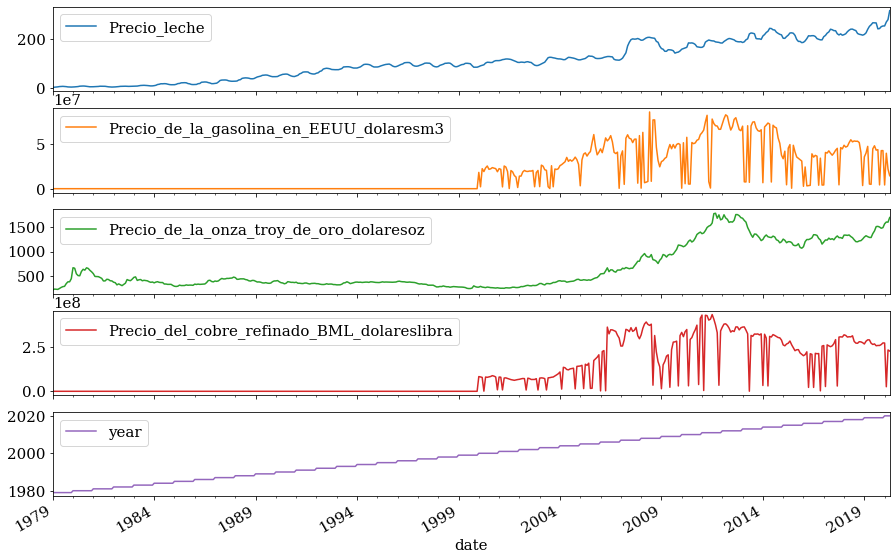

In [40]:
dataFiltered.plot(subplots=True)
plt.show()

We create our training validation, and test datasets. We divided our data in a standard ratio, 70% training data, 20% validation data, and 10% test data. 

In [41]:
column_indices = {name: i for i, name in enumerate(data_X.columns)}

sample = 24
prediction = 1

cutoff_date_val = 25*14+1 # Around 70% of the data
cutoff_date_test = 25*18+1 # Around 90% of the data

n = len(dataFiltered)

train_data = dataFiltered[:cutoff_date_val]
val_data = dataFiltered[cutoff_date_val:cutoff_date_test]
test_data = dataFiltered[cutoff_date_test:]

num_features = dataFiltered.shape[1]

We print the standard deviation of the training data for later.

In [42]:
train_data.std()

Precio_leche                                  4.743433e+01
Precio_de_la_gasolina_en_EEUU_dolaresm3       1.576524e+07
Precio_de_la_onza_troy_de_oro_dolaresoz       1.133829e+02
Precio_del_cobre_refinado_BML_dolareslibra    8.881744e+07
year                                          8.456482e+00
dtype: float64

We normalize the data.

In [43]:
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)

val_data = scaler.transform(val_data)

test_data = scaler.transform(test_data)

In [44]:
train_data = pd.DataFrame(train_data,index=dataFiltered.index[:cutoff_date_val],columns=dataFiltered.columns).dropna(axis=1,how="all")

val_data = pd.DataFrame(val_data,index=dataFiltered.index[cutoff_date_val:cutoff_date_test],columns=dataFiltered.columns)[train_data.columns]

test_data = pd.DataFrame(test_data,index=dataFiltered.index[cutoff_date_test:],columns=dataFiltered.columns)[train_data.columns]

And we can now visualize the new data.

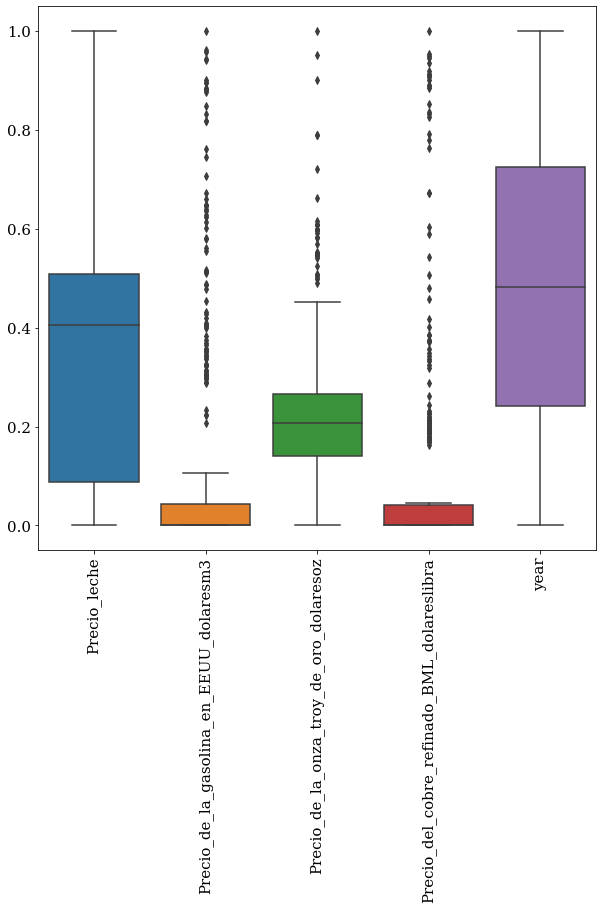

In [45]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=train_data)
_ = ax.set_xticklabels(train_data.keys(), rotation=90)

Since we will be training a neural network, we will augment our existing data.

In [46]:
train_augmented = pd.DataFrame(columns=train_data.columns)

for i in range(0, len(train_data) - (sample+prediction)+1):
    train_augmented = train_augmented.append(train_data[i:i+(sample+prediction)])


train_data = train_augmented

In [47]:
column_indices = {name: i for i, name in enumerate(train_data.columns)}

To start, we use Keras [tutorial](https://www.tensorflow.org/tutorials/structured_data/time_series#multi-step_models) to define our window generator.

In [48]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=val_data, test_df=test_data,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='Precio_leche', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(0,max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col}')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Tiempo')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

In [49]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Thus, we create our window generator, which we will use to create the windows to train our model to predict the price of milk from the price of the previous 24 months.

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): None

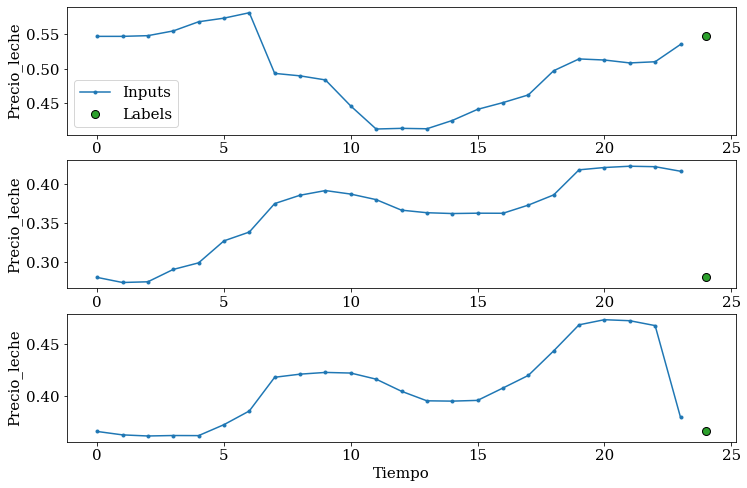

In [50]:
window = WindowGenerator(input_width=sample,
                               label_width=prediction,
                               shift=prediction)

window.plot()
window

For simplicity, we train a linear model with a dense layer.

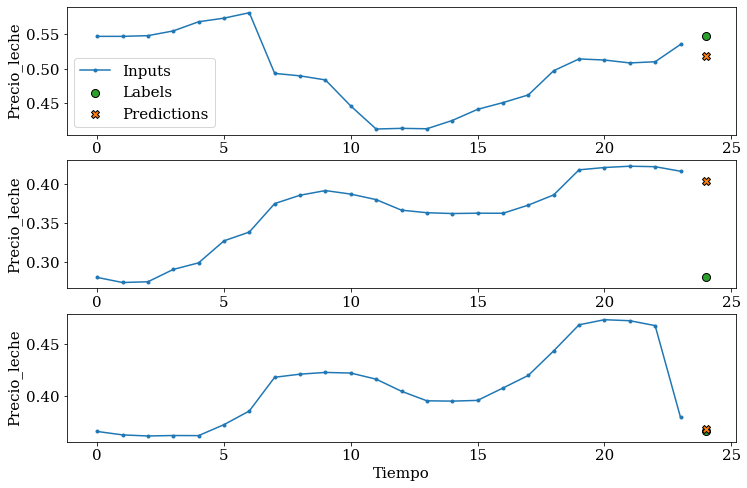

In [54]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(prediction*num_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([prediction, num_features])
])

MAX_EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  mode='min')

multi_dense_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = multi_dense_model.fit(window.train, epochs=MAX_EPOCHS,
                    validation_data=window.val,
                    callbacks=[early_stopping])

IPython.display.clear_output()

window.plot(multi_dense_model)

In [55]:
multi_dense_model.evaluate(window.test)

1/1 [==============================] - 0s 46ms/step - loss: 0.0501 - mean_absolute_error: 0.1545


[0.05014004185795784, 0.1545427143573761]

Since our data is normalized the mean squared error is not indicative of the actual error. We have to look back at the standard deviation (std) of the precipitation training data. Thus, with a std of around 47, the MAE is 7 units (the current result gave a MAE of 0.15), which is a relatively high number with respect to the milk data. In conclusion, this model could be improved by removing outliers from the data already used in the model and by handling the missing data instead of removing those variables entirely. Similarly, a time-series model could be used to forecast rising temperature and carbon emissions to incentivize society and corporations to promote mitigating actions. 